In [1]:
##Import libraries
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

Using TensorFlow backend.


In [2]:
## Initialising the CNN
classifier = Sequential()

W0131 15:56:05.891495 12896 deprecation_wrapper.py:119] From C:\Users\Administrator\.conda\envs\tensorflow\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.



In [3]:
## Convolution(64 feature detector of dimension 3 by 3), input shape 3 layer for color image)
classifier.add(Conv2D(64,(3,3),input_shape = (64,64,3), activation = 'relu'))
## MaxPooling
classifier.add(MaxPooling2D(pool_size = (2,2)))

## Add another layer
classifier.add(Conv2D(64,(3,3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2,2)))

## Add another layer
classifier.add(Conv2D(64,(3,3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2,2)))


W0131 15:56:06.029170 12896 deprecation_wrapper.py:119] From C:\Users\Administrator\.conda\envs\tensorflow\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0131 15:56:06.040143 12896 deprecation_wrapper.py:119] From C:\Users\Administrator\.conda\envs\tensorflow\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0131 15:56:06.114090 12896 deprecation_wrapper.py:119] From C:\Users\Administrator\.conda\envs\tensorflow\lib\site-packages\keras\backend\tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.



In [4]:
## Flattening
classifier.add(Flatten())

In [5]:
## Fully connected ANN, Hidden ANN and output layer
classifier.add(Dense(units = 128, activation = 'relu'))

In [6]:
#output layer
classifier.add(Dense(units = 1, activation = 'sigmoid'))

In [7]:
## Compliling
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

W0131 15:56:06.534984 12896 deprecation_wrapper.py:119] From C:\Users\Administrator\.conda\envs\tensorflow\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0131 15:56:06.612913 12896 deprecation_wrapper.py:119] From C:\Users\Administrator\.conda\envs\tensorflow\lib\site-packages\keras\backend\tensorflow_backend.py:3376: The name tf.log is deprecated. Please use tf.math.log instead.

W0131 15:56:06.626904 12896 deprecation.py:323] From C:\Users\Administrator\.conda\envs\tensorflow\lib\site-packages\tensorflow\python\ops\nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [8]:
classifier.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 62, 62, 64)        1792      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2304)              0         
__________

In [9]:
## data importing and transforming and scaling
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)

In [10]:
## Scaling test data
##no  data augmentation
test_datagen = ImageDataGenerator(rescale=1./255)

In [12]:
## Importing training data
train_set = train_datagen.flow_from_directory('training',
                                               target_size=(64, 64),
                                               
                                               class_mode='binary')

Found 647 images belonging to 2 classes.


In [13]:
train_set.class_indices

{'with helmet': 0, 'without helmet': 1}

In [14]:
#which is cat which is dog?
label_map = (train_set.class_indices)
print(label_map)

{'with helmet': 0, 'without helmet': 1}


In [15]:
## Importng test data
test_set = test_datagen.flow_from_directory('testing',
                                            target_size=(64, 64),
                                            
                                            class_mode='binary')

Found 208 images belonging to 2 classes.


In [38]:
## fitting model to images
classifier.fit_generator(
        train_set,
        epochs=10,
        validation_data=test_set,
        steps_per_epoch=10,
        validation_steps=38
        )

Epoch 1/10
10/10 [==============================] - 7s 694ms/step - loss: 0.3922 - acc: 0.8418 - val_loss: 0.2379 - val_acc: 0.8991
Epoch 2/10
10/10 [==============================] - 7s 720ms/step - loss: 0.3507 - acc: 0.8688 - val_loss: 0.2729 - val_acc: 0.8776
Epoch 3/10
10/10 [==============================] - 7s 673ms/step - loss: 0.3388 - acc: 0.8607 - val_loss: 0.2415 - val_acc: 0.8991
Epoch 4/10
10/10 [==============================] - 7s 660ms/step - loss: 0.3365 - acc: 0.8562 - val_loss: 0.2766 - val_acc: 0.8706
Epoch 5/10
10/10 [==============================] - 7s 682ms/step - loss: 0.3855 - acc: 0.8331 - val_loss: 0.2814 - val_acc: 0.9032
Epoch 6/10
10/10 [==============================] - 7s 660ms/step - loss: 0.3303 - acc: 0.8625 - val_loss: 0.2508 - val_acc: 0.9062
Epoch 7/10
10/10 [==============================] - 7s 674ms/step - loss: 0.2657 - acc: 0.8922 - val_loss: 0.2283 - val_acc: 0.9102
Epoch 8/10
10/10 [==============================] - 7s 660ms/step - loss: 0.

In [28]:
## prediction of single new data
import numpy as np
from keras.preprocessing import image
test_image= image.load_img('single_prediction\\abf.jpg'
                           ,target_size =(64,64))




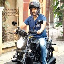

In [29]:
test_image

In [30]:
## Convert image to array
test_image = image.img_to_array(test_image)

In [31]:
## For single prediction change the dimension . 

test_image=test_image.reshape(1,64,64,3)

In [32]:
result = classifier.predict(test_image)

In [36]:
if result == 1:
    prediction = 'without helmet'
else:
    prediction = 'with helmet'
    

In [37]:
prediction

'with helmet'